## 作業
在鐵達尼資料集中，   
可以用今天範例中提到的三種辨識異常值的方法，  
以 training data 為資料集。  
1.觀察票價是否有異常值的現象?  
2.你覺得找出的異常是真的異常? 你覺得需要做處理嗎?  
(試著講出自己的想法。)  


### 資料
鐵達尼號 train 資料集


In [19]:
# library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [20]:
df_train = pd.read_csv("Titanic_train.csv")

### 探索性分析:
*  觀察-是否有異常值  
我們來觀察一下 Fare 變數吧!!

## Q1:觀察票價是否有異常值的現象?

## 方法1
* 進行一個描述性的統計（規定範圍），從而檢視哪些值是不合理的（範圍以外的值）。  


32.2042079685746
49.693428597180905


C:\Users\benao\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


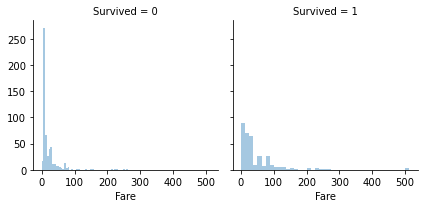

In [21]:
print(df_train["Fare"].mean())
print(df_train["Fare"].std())

g = sns.FacetGrid(df_train, col="Survived")
g.map(sns.distplot, "Fare", kde=False)

In [22]:
print(df_train["Fare"].describe())
# 票價從 0 元到 512元，平均 14元，the third quartile = 31，或許有異常值

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


## 方法 2
* 進行3倍標準差原則的計算，從而檢視哪些值是可疑的異常值。  


In [23]:
def outlier_z_score(data, times):
    d_mean = np.mean(data)
    d_std = np.std(data)
    z_score = [(i - d_mean) / d_std for i in data]
    return np.where(np.abs(z_score) > times)
outlier_index1 = outlier_z_score(df_train["Fare"], 3)
print(outlier_index1[0])
print(df_train.loc[outlier_index1[0], "Fare"])

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]
27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64


## 方法3-盒鬚圖判別法(IQR method)

In [30]:
def outlier_iqr(da, times):
    quartile_1, quartile_3 = np.nanpercentile(da, [25, 75])
    iqr = quartile_3 - quartile_1
    upper_bound = quartile_3 + (times * iqr)
    lower_bound = quartile_1 - (times * iqr)
    return np.where((da > upper_bound) | (da < lower_bound))
outlier_index2 = outlier_iqr(df_train["Fare"], 2)
print(outlier_index2[0])
print(df_train.loc[outlier_index2[0], "Fare"])

[ 27  31  34  61  62  88 102 118 124 139 195 215 224 230 245 256 257 258
 262 268 269 275 290 291 297 299 305 306 307 310 311 318 319 325 332 334
 337 341 373 375 377 380 390 393 412 435 438 445 453 484 486 496 498 504
 505 520 527 537 544 550 557 558 581 585 587 591 609 627 659 660 679 689
 698 700 708 716 730 737 741 742 759 763 765 779 789 802 820 829 835 849
 856 879]
27     263.0000
31     146.5208
34      82.1708
61      80.0000
62      83.4750
         ...   
829     80.0000
835     83.1583
849     89.1042
856    164.8667
879     83.1583
Name: Fare, Length: 92, dtype: float64


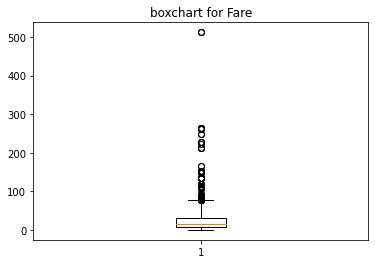

In [31]:
plt.boxplot(df_train["Fare"][~np.isnan(df_train["Fare"])], whis=2)
plt.title("boxchart for Fare")
plt.show()

## Q2:你覺得找出的異常是真的異常? 你覺得需要做處理嗎?


In [ ]:
# 由方法 3 找出大量的異常值(92個)，應該是船公司為了服務等級而作出的差別票價，因此沒有必要做處理。
# 至於票價與存活率的關聯，以目前的資料看來，沒有證據顯示付出越高票價的人，在沈船時有優先登上救生艇的權力，
# 因此沒有充分證據證明二者的關係。